## Housing Values in Suburbs of Boston

The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:

<li> crim - per capita crime rate by town.
<li> zn - proportion of residential land zoned for lots over 25,000 sq.ft.
<li> indus - proportion of non-retail business acres per town.
<li> chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
<li> nox - nitrogen oxides concentration (parts per 10 million).
<li> rm - average number of rooms per dwelling.
<li> age - proportion of owner-occupied units built prior to 1940.
<li> dis - weighted mean of distances to five Boston employment centres.
<li> rad - index of accessibility to radial highways.
<li> tax - full-value property-tax rate per 10,000 dollars.
<li> ptratio - pupil-teacher ratio by town.
<li> black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
<li> lstat - lower status of the population (percent).
<li> medv - median value of owner-occupied homes in 1000s (dollar).

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.python.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import gc; gc.enable()

In [6]:
learning_rate = 0.01
epochs_value = 100
batch_size_value = 8

In [7]:
FEATURES = ["crim", "zn", "indus", "nox", "rm", "age", "dis", "tax", "ptratio"]
LABEL = "medv"

In [8]:
# fix random seed for reproducibility
seed = 123; 
np.random.seed(seed); 
tf.set_random_seed(seed)

## load dataset

In [9]:
data = pd.read_csv("Boston.csv")
data.shape
data.dtypes
#data.info()

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [10]:
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Training and Test Split 85% and 15%

In [12]:
training_set ,test_set = train_test_split(data,test_size=0.15)

# Build the model

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,  input_shape=(len(FEATURES),), activation="sigmoid", kernel_initializer = tf.random_normal_initializer))
model.add(tf.keras.layers.Dense(1,kernel_initializer = tf.random_normal_initializer)) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [14]:
layer_input = model.layers[0]
print(layer_input.get_weights()[0].shape)

(9, 10)


## Compile

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

## Train the model

In [16]:
training_model = model.fit(training_set[FEATURES].values, 
          training_set[LABEL].values, 
          epochs=epochs_value,
          batch_size=batch_size_value,
          validation_data=(test_set[FEATURES].values, test_set[LABEL].values))

Train on 430 samples, validate on 76 samples
Epoch 1/100
430/430 [==============================] - 0s 425us/step - loss: 499.0207 - mean_squared_error: 499.0207 - val_loss: 539.1545 - val_mean_squared_error: 539.1545
Epoch 2/100
430/430 [==============================] - 0s 118us/step - loss: 469.4051 - mean_squared_error: 469.4051 - val_loss: 516.4804 - val_mean_squared_error: 516.4804
Epoch 3/100
430/430 [==============================] - 0s 127us/step - loss: 451.3959 - mean_squared_error: 451.3959 - val_loss: 498.6430 - val_mean_squared_error: 498.6430
Epoch 4/100
430/430 [==============================] - 0s 112us/step - loss: 434.6497 - mean_squared_error: 434.6497 - val_loss: 480.4726 - val_mean_squared_error: 480.4726
Epoch 5/100
430/430 [==============================] - 0s 111us/step - loss: 418.4302 - mean_squared_error: 418.4302 - val_loss: 463.4664 - val_mean_squared_error: 463.4664
Epoch 6/100
430/430 [==============================] - 0s 111us/step - loss: 401.1872 - me

## Plot mean squared error

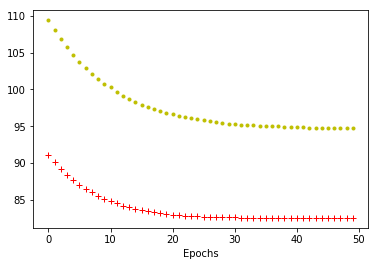

In [19]:
plt.plot(training_model.history['mean_squared_error'][-50:], 'r+', label='training mean_squared_error')
plt.plot(training_model.history['val_mean_squared_error'][-50:], 'y.', label='evaluation mean_squared_error')
plt.xlabel('Epochs')
plt.show()

## Evaluate on test data

In [20]:
model.evaluate(test_set[FEATURES].values, test_set[LABEL].values) # [81, 81]

76/76 [==============================] - 0s 72us/step


[94.8009080384907, 94.8009080384907]

## Making Predictions

In [21]:
predictions = model.predict(x=test_set[FEATURES].values) #, verbose=1)

## RMSE

In [22]:
rmse = np.sqrt(mean_squared_error(test_set[LABEL].values, predictions))
print("RMSE: ", rmse) # 9.03

RMSE:  9.736575796665552


# Question 1: re-train the model by using the following DNN topology (adding a new layer with 100 nodes). A) Plot "mean squared error" for the new DNN topology and compare the result with the initial DNN network. B) Calcuate the number of new parameters. C) What is the impact on "mean squared error" when using a larger network topology? why?

##
### model = tf.keras.Sequential()
### model.add(tf.keras.layers.Dense(10,  input_shape=(len(FEATURES),), activation="relu", kernel_initializer = tf.random_normal_initializer))
### model.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer = tf.random_normal_initializer))
### model.add(tf.keras.layers.Dense(1,kernel_initializer = tf.random_normal_initializer)) 
##

# Question 2: change the value of epochs_value = 100 to epochs_value = 300. what is the learning impact why?